In [1]:
import pandas as pd
import numpy as np
from scipy.sparse.csgraph import reverse_cuthill_mckee
from scipy.sparse import csr_matrix
import matplotlib.pylab as plt
import scipy.sparse as sps
from random import randint
df = pd.read_csv('online_retail_transaction.csv',header=None,index_col=None)
df.shape # dimensione originale

(4372, 4223)

In [61]:
def compute_band_matrix(original_dataset = None,dim_finale=1000, nome__file_item=None,num_sensibile=1):
    if original_dataset is not None and len(original_dataset) >= dim_finale and len(original_dataset.columns) >= dim_finale: 
        # leggo nomi items
        file = open(nome__file_item, "r") 
        items = file.read().splitlines()
        # permuto righe e colonne del df inizale e prendo le prime :dim_finale
        np.random.seed(seed=13)
        random_column = np.random.permutation(df.shape[1])[:dim_finale]
        random_row = np.random.permutation(df.shape[0])[:dim_finale]
        # recupero gli item selezionati nel relativo ordine == colonne
        items_reordered = [items[i] for i in random_column] 
        # df selezionato e square
        df_square = df.iloc[random_row][random_column];
        
        # selezioni gli utlimi num_sensibili come item sensibili
        
        df_sensibili = df_square[df_square.columns[-num_sensibile:]]
        df_common_items = df_square[df_square.columns[0:-num_sensibile]]
        zero_data_to_add = np.zeros(shape=(len(df_common_items),num_sensibile))
        columns_to_add = ["temp_"+str(x) for x in range(0,num_sensibile)] 
        
        df_zeri = pd.DataFrame(zero_data_to_add, columns=columns_to_add,index=df_common_items.index,dtype='uint8')
        df_square = pd.concat([df_common_items,df_zeri],axis=1)
        #print(df_zeri.shape) dim_finalexnum_sensibili
        #print(df_square.shape)
        
        # plot matrice sparsa iniziale
        plt.spy(df_square,marker='.',markersize='0.3')
        plt.show()
        
        # applicazione algoritmo RCM
        sparse = csr_matrix(df_square)
        order = reverse_cuthill_mckee(sparse)
        # riordino i dati sensibili
        df_sensibili = df_sensibili.iloc[order]
        
        # ora devo prendere gli item selzionati prima e riordinarli ancora
        # secondo quello scritto in order quindi
        items_final = [items_reordered[i] for i in order]
        column_reordered = [df_square.columns[i] for i in order]
        # df bandizzato
        df_square_band = df_square.iloc[order][column_reordered]
        # plotto
        plt.spy(df_square_band,marker='.',markersize='0.3')
        plt.show()
        
        # banda dataframe inizale
        [i,j]=np.where(df_square == 1)
        bw = max(i-j) +1
        print("Bandwidth first RCM",bw)

        # banda dataframe dopo RCM
        [i,j]=np.where(df_square_band == 1)
        bw = max(i-j) +1
        print("Bandwidth after RCM",bw)
        return df_square_band
        


(1500, 10)
(1500, 1500)


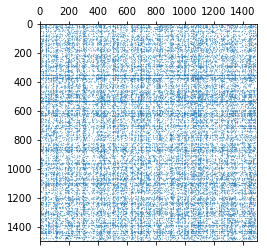

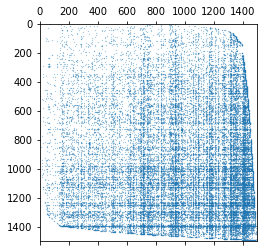

Bandwidth first RCM 1490
Bandwidth after RCM 1269
      2129  1083  3788  3525  387   2561  2364  2407  1914  751 
810      0     0     0     0     0     0     1     0     0     0
1179     0     0     0     0     0     0     0     0     0     0
3335     0     0     0     0     0     0     0     0     0     0
1030     0     0     0     0     0     0     1     0     0     0
1082     0     0     0     0     0     0     0     0     0     0
668      0     0     0     0     0     0     0     0     0     0
3101     0     0     0     0     0     0     0     0     0     0
1638     0     0     0     0     0     0     0     0     0     0
2912     0     0     0     0     0     0     0     0     0     0
3987     0     0     0     0     0     0     0     0     0     0
552      0     0     0     0     0     0     0     0     0     0
48       0     0     0     0     0     0     0     0     0     0
1278     0     0     0     0     0     0     0     0     0     0
2555     0     0     0     0     0     0

In [69]:
df_square = compute_band_matrix(original_dataset = df, dim_finale = 1500, nome__file_item="lista_items.txt",num_sensibile=10)

In [70]:
for i in range(0,len(df_square.columns)):
    if "temp" in str(df_square.columns[i]) :
        print (i)

80
234
268
324
450
687
766
929
1119
1384


In [67]:
df_square.columns[3]

'temp_70'

In [66]:
df_square

,2176,3005,3030,temp_70,3044,temp_63,1438,134,2567,4175,...,905,314,3107,temp_41,2229,temp_77,202,temp_73,2500,3325
3050,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1560,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
704,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3665,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3187,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
